# Evaluation Project - 2

# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:

* Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

* HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 


In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import matplotlib.pyplot as plt 
import seaborn as sns

#for model building
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
#checking dimensions of dataset
df.shape

(1470, 35)

There are **1470** rows and **35** columns including target variable.

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#checkig Data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

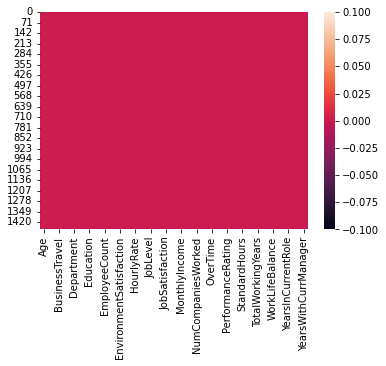

In [10]:
#Let's plot the heatmap for null values
sns.heatmap(df.isnull())
plt.show()


In [18]:
#Let's check the statistic matrix
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [19]:
#Check Null Values
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [20]:
#removing unnecessary columns which are not impacting target variable 
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

# Categorical Features

In [21]:
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

# LabeEncoding target variables

In [23]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

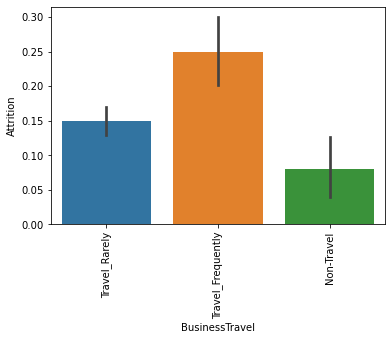

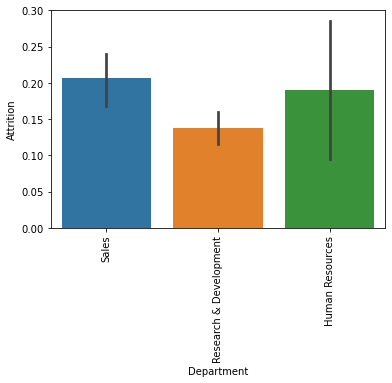

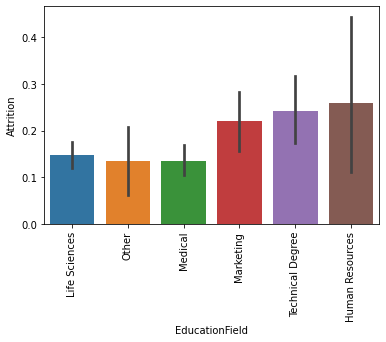

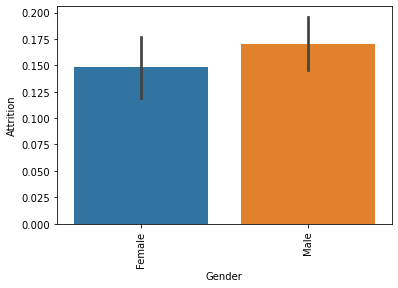

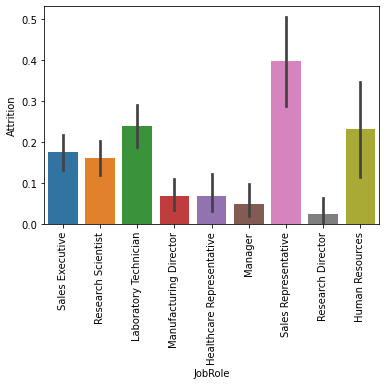

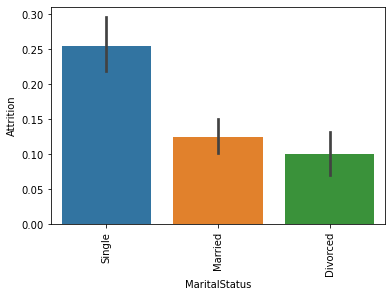

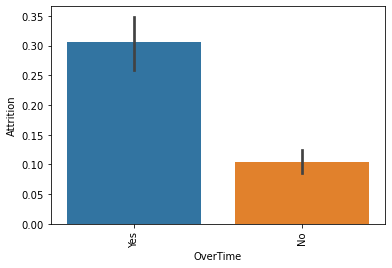

In [24]:
# generating charts that compare all of the categorical variables with Attrition variable
columns=['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.barplot(x=col, y ='Attrition', data=df)
    plt.xticks(rotation=90)

# LabeEncoding objects variables

In [25]:
#Lable encoding objects variables
from sklearn.preprocessing import LabelEncoder
cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'] 
label = LabelEncoder()
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

# Checking correlation

In [26]:
#Let's check the correlation
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

<AxesSubplot:>

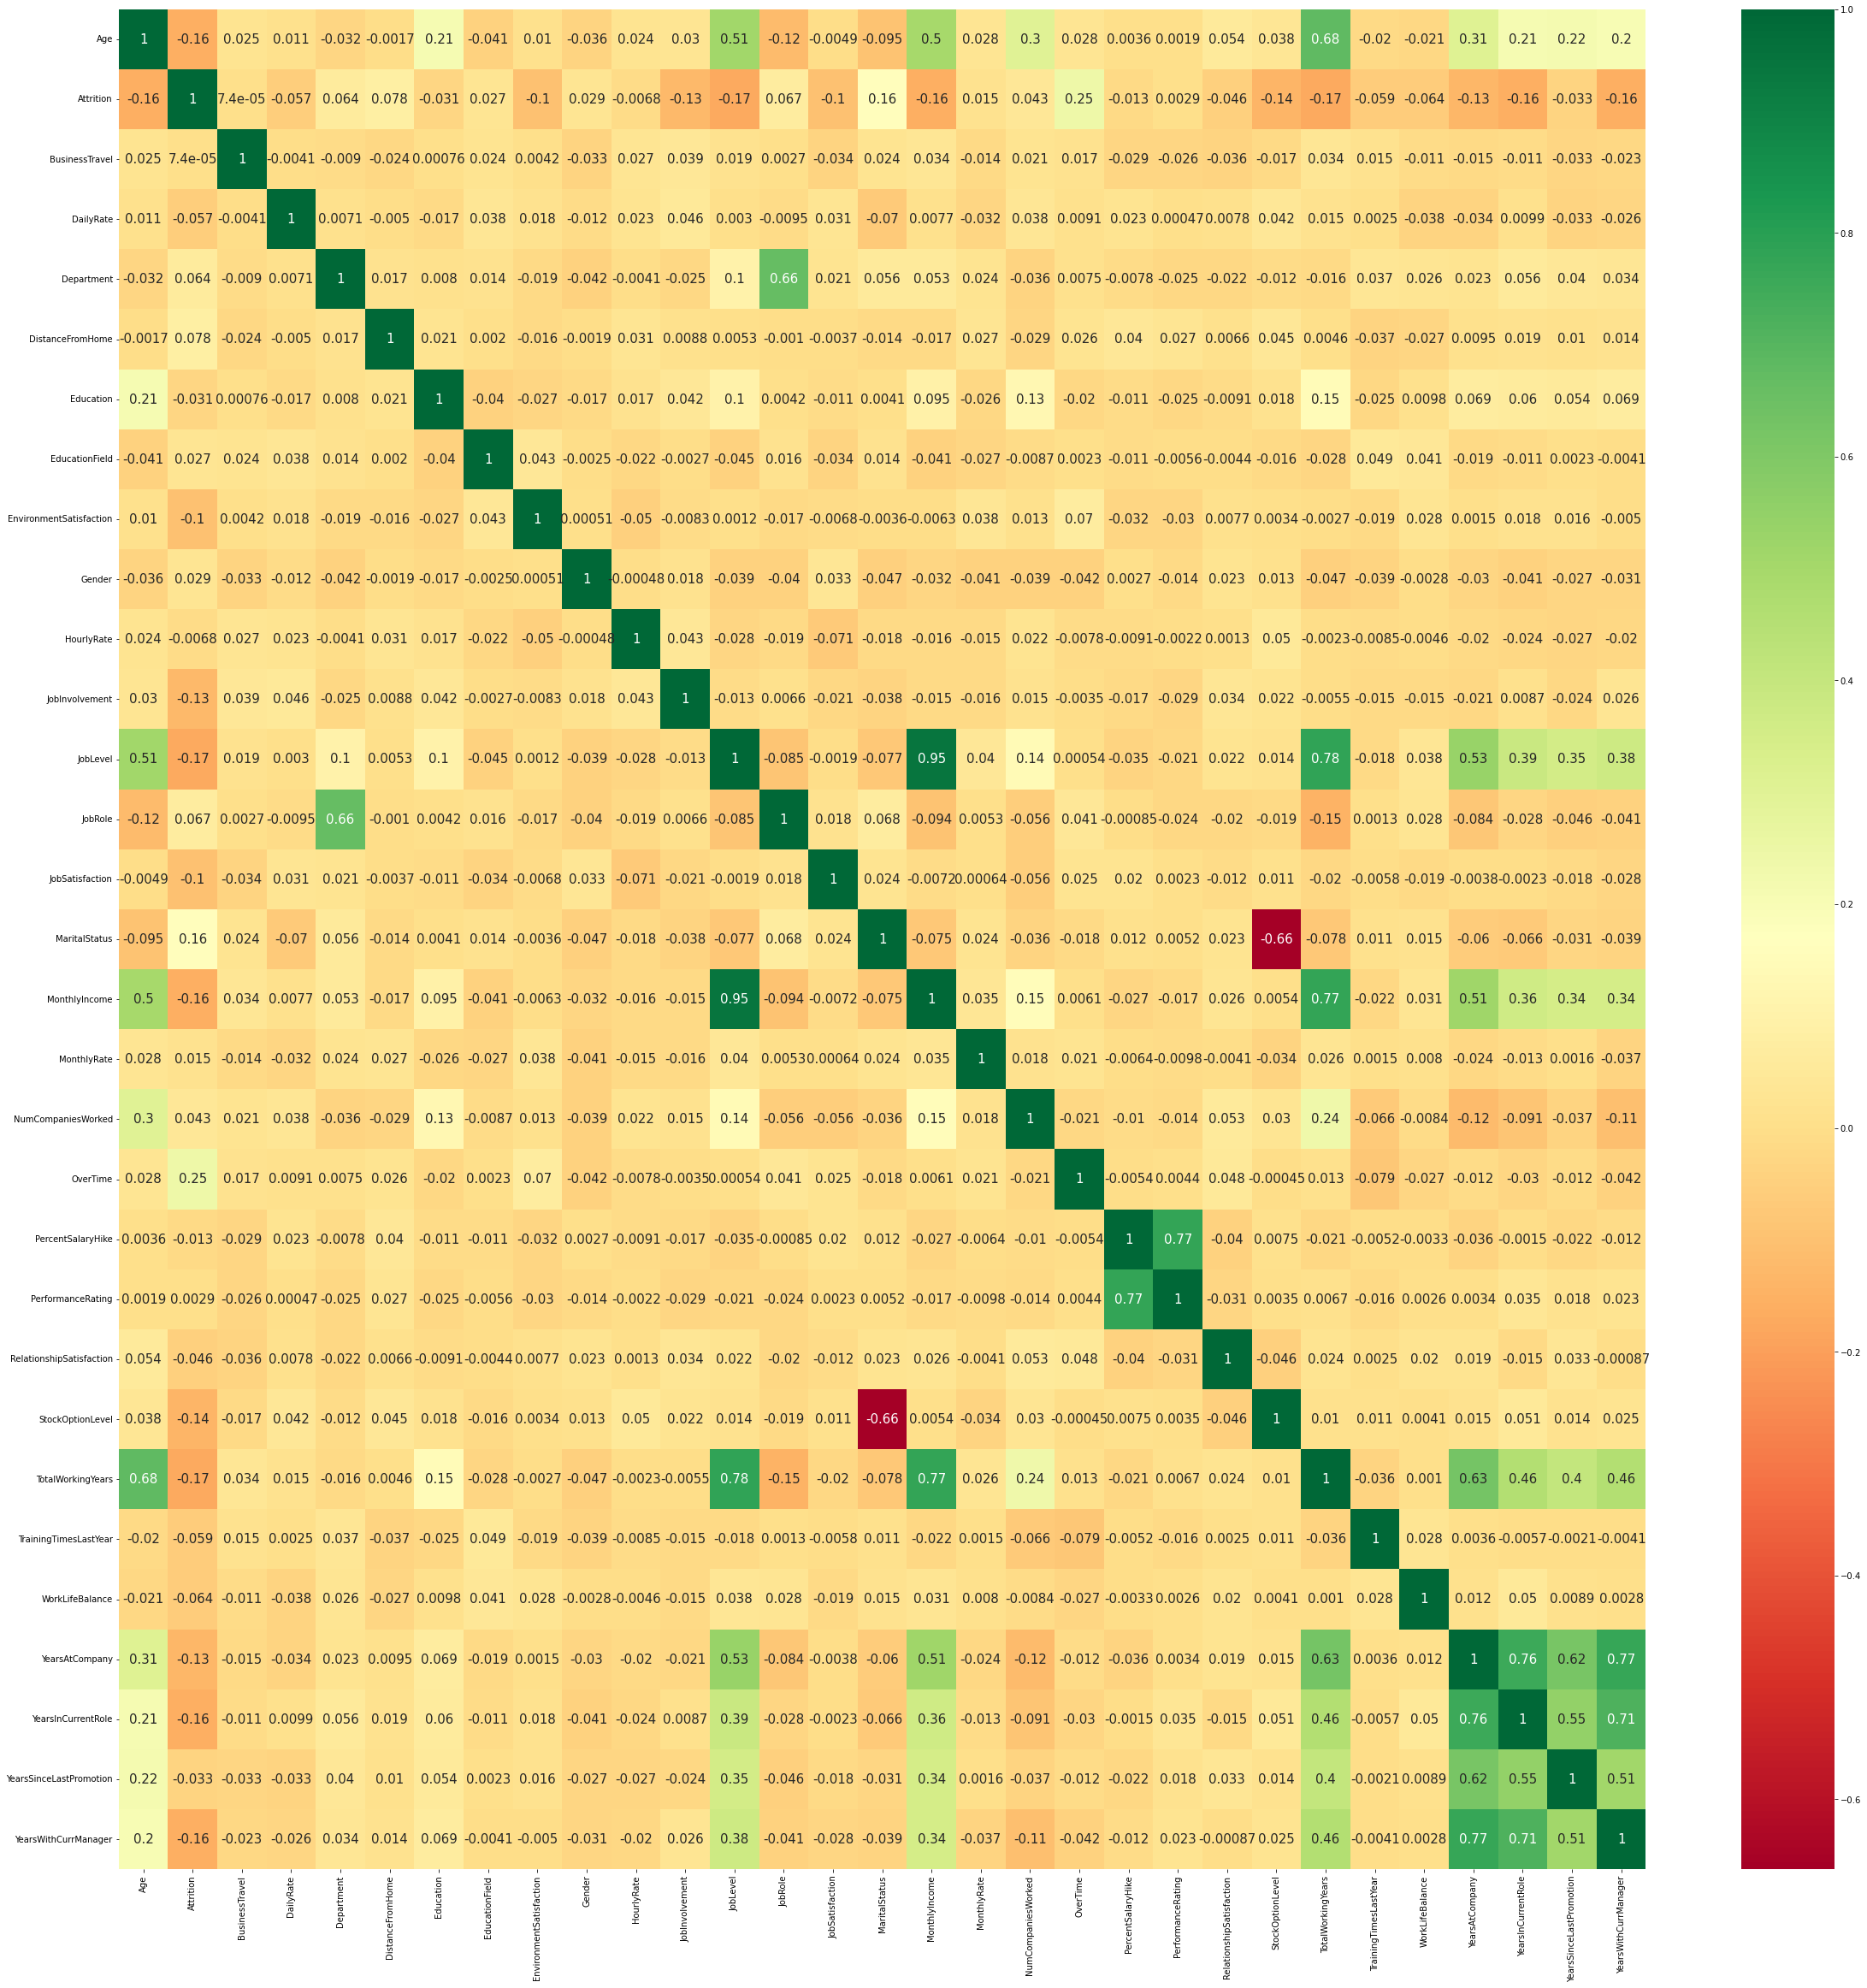

In [27]:
#Heatmap for correlation
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<AxesSubplot:>

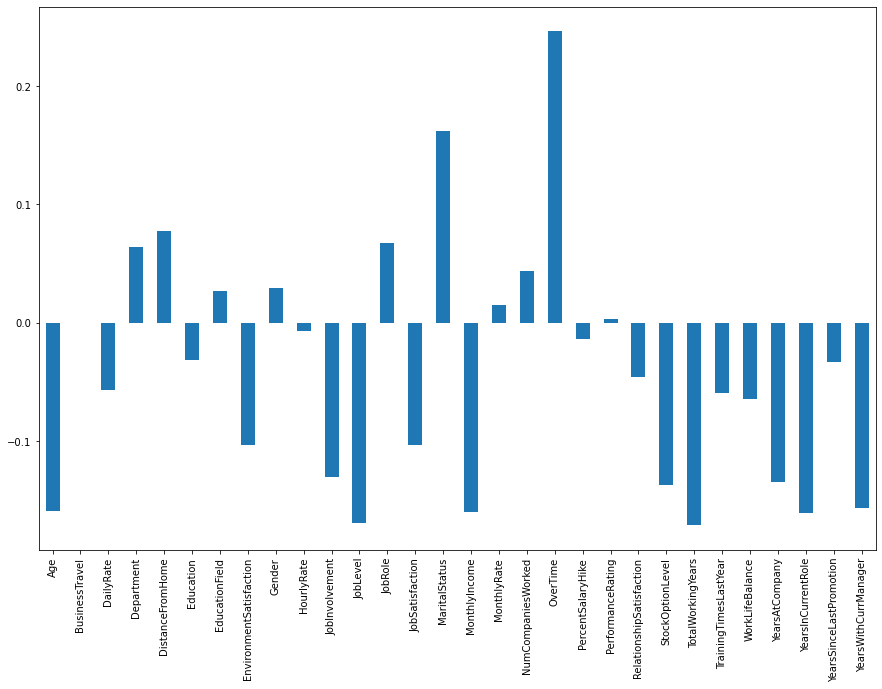

In [28]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).plot(kind='bar', figsize=(15, 10))

# Numerical Features

In [29]:
df_cont=df.select_dtypes(include='int64')
df_cont.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

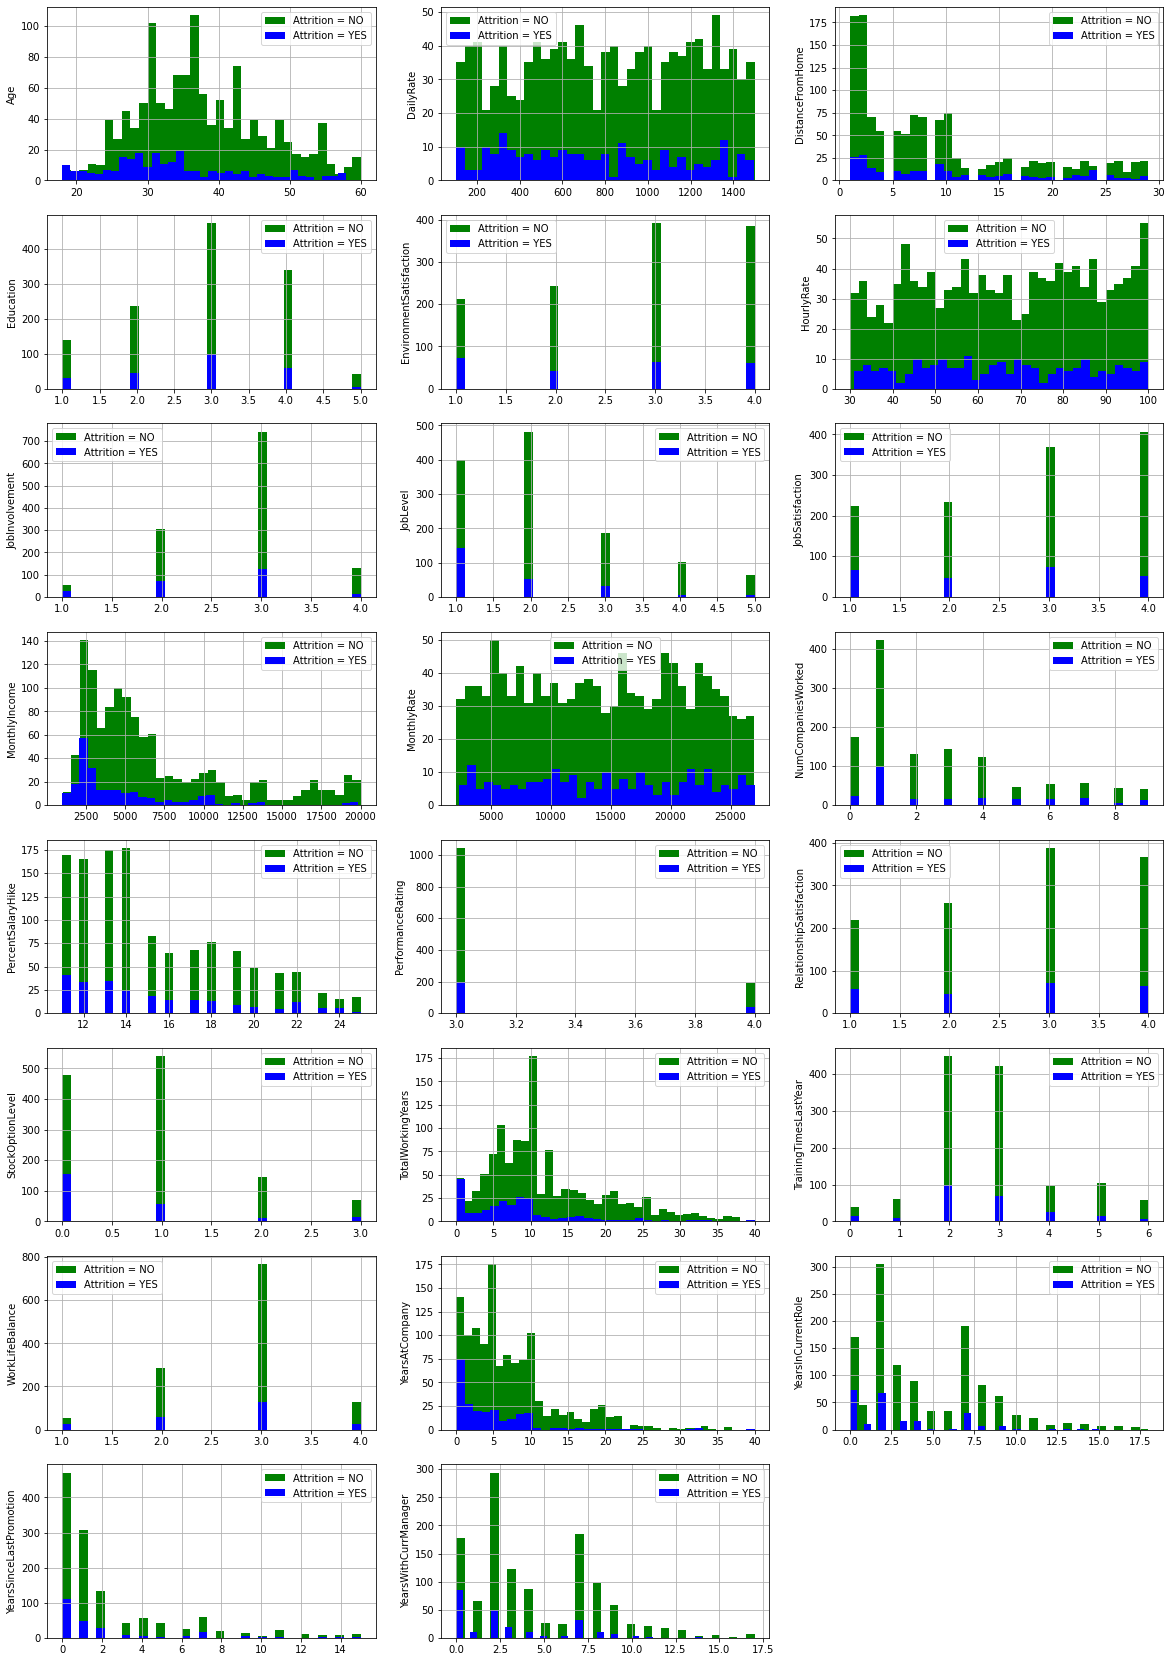

In [30]:
plt.figure(figsize=(20, 30))

for i, column in enumerate(df_cont, 1):
    plt.subplot(8, 3, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='green', label='Attrition = NO', alpha=1)
    df[df["Attrition"] == 1][column].hist(bins=35, color='blue', label='Attrition = YES', alpha=1)
    plt.legend()
    plt.ylabel(column)


 **The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs**

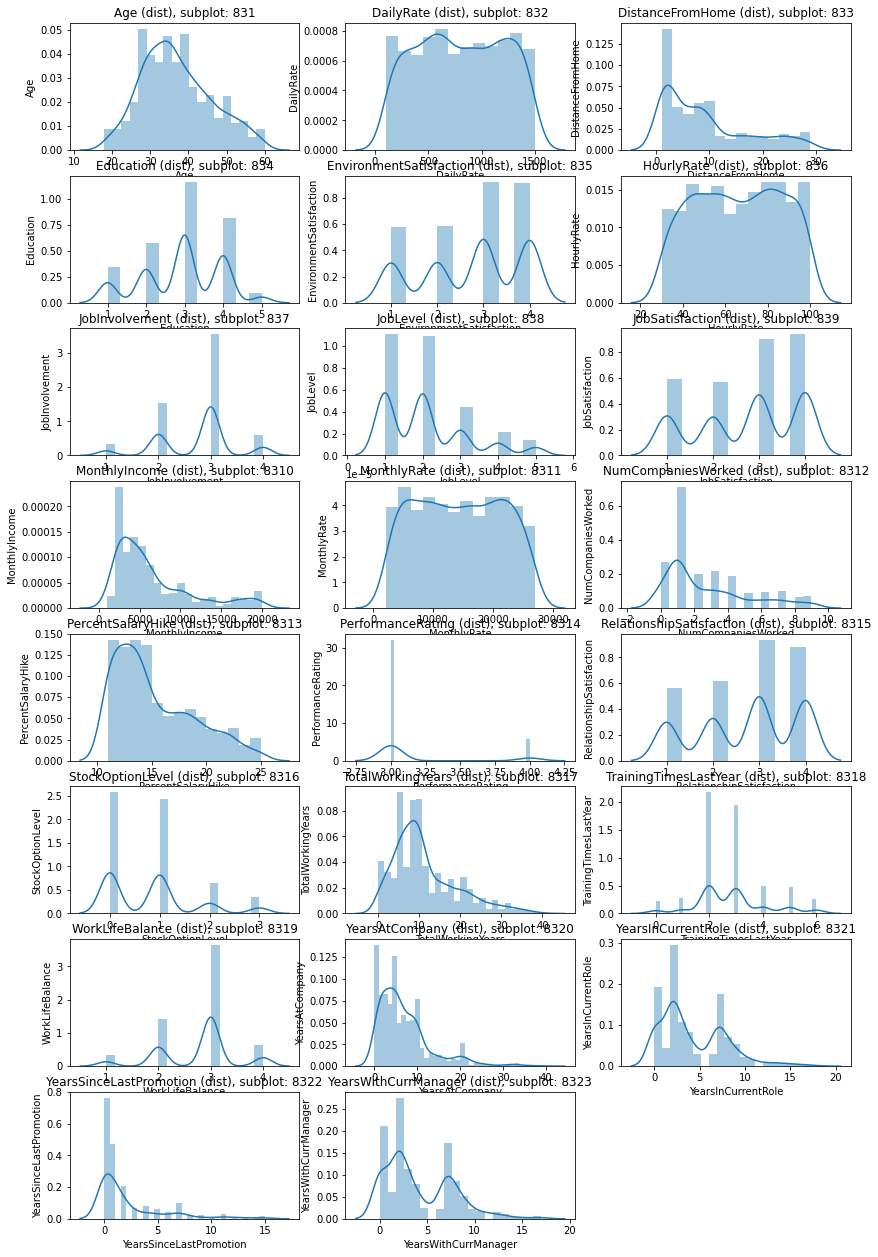

In [31]:
#Numerical Data
Columns= df_cont.columns

#  plot Numerical Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()


# Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

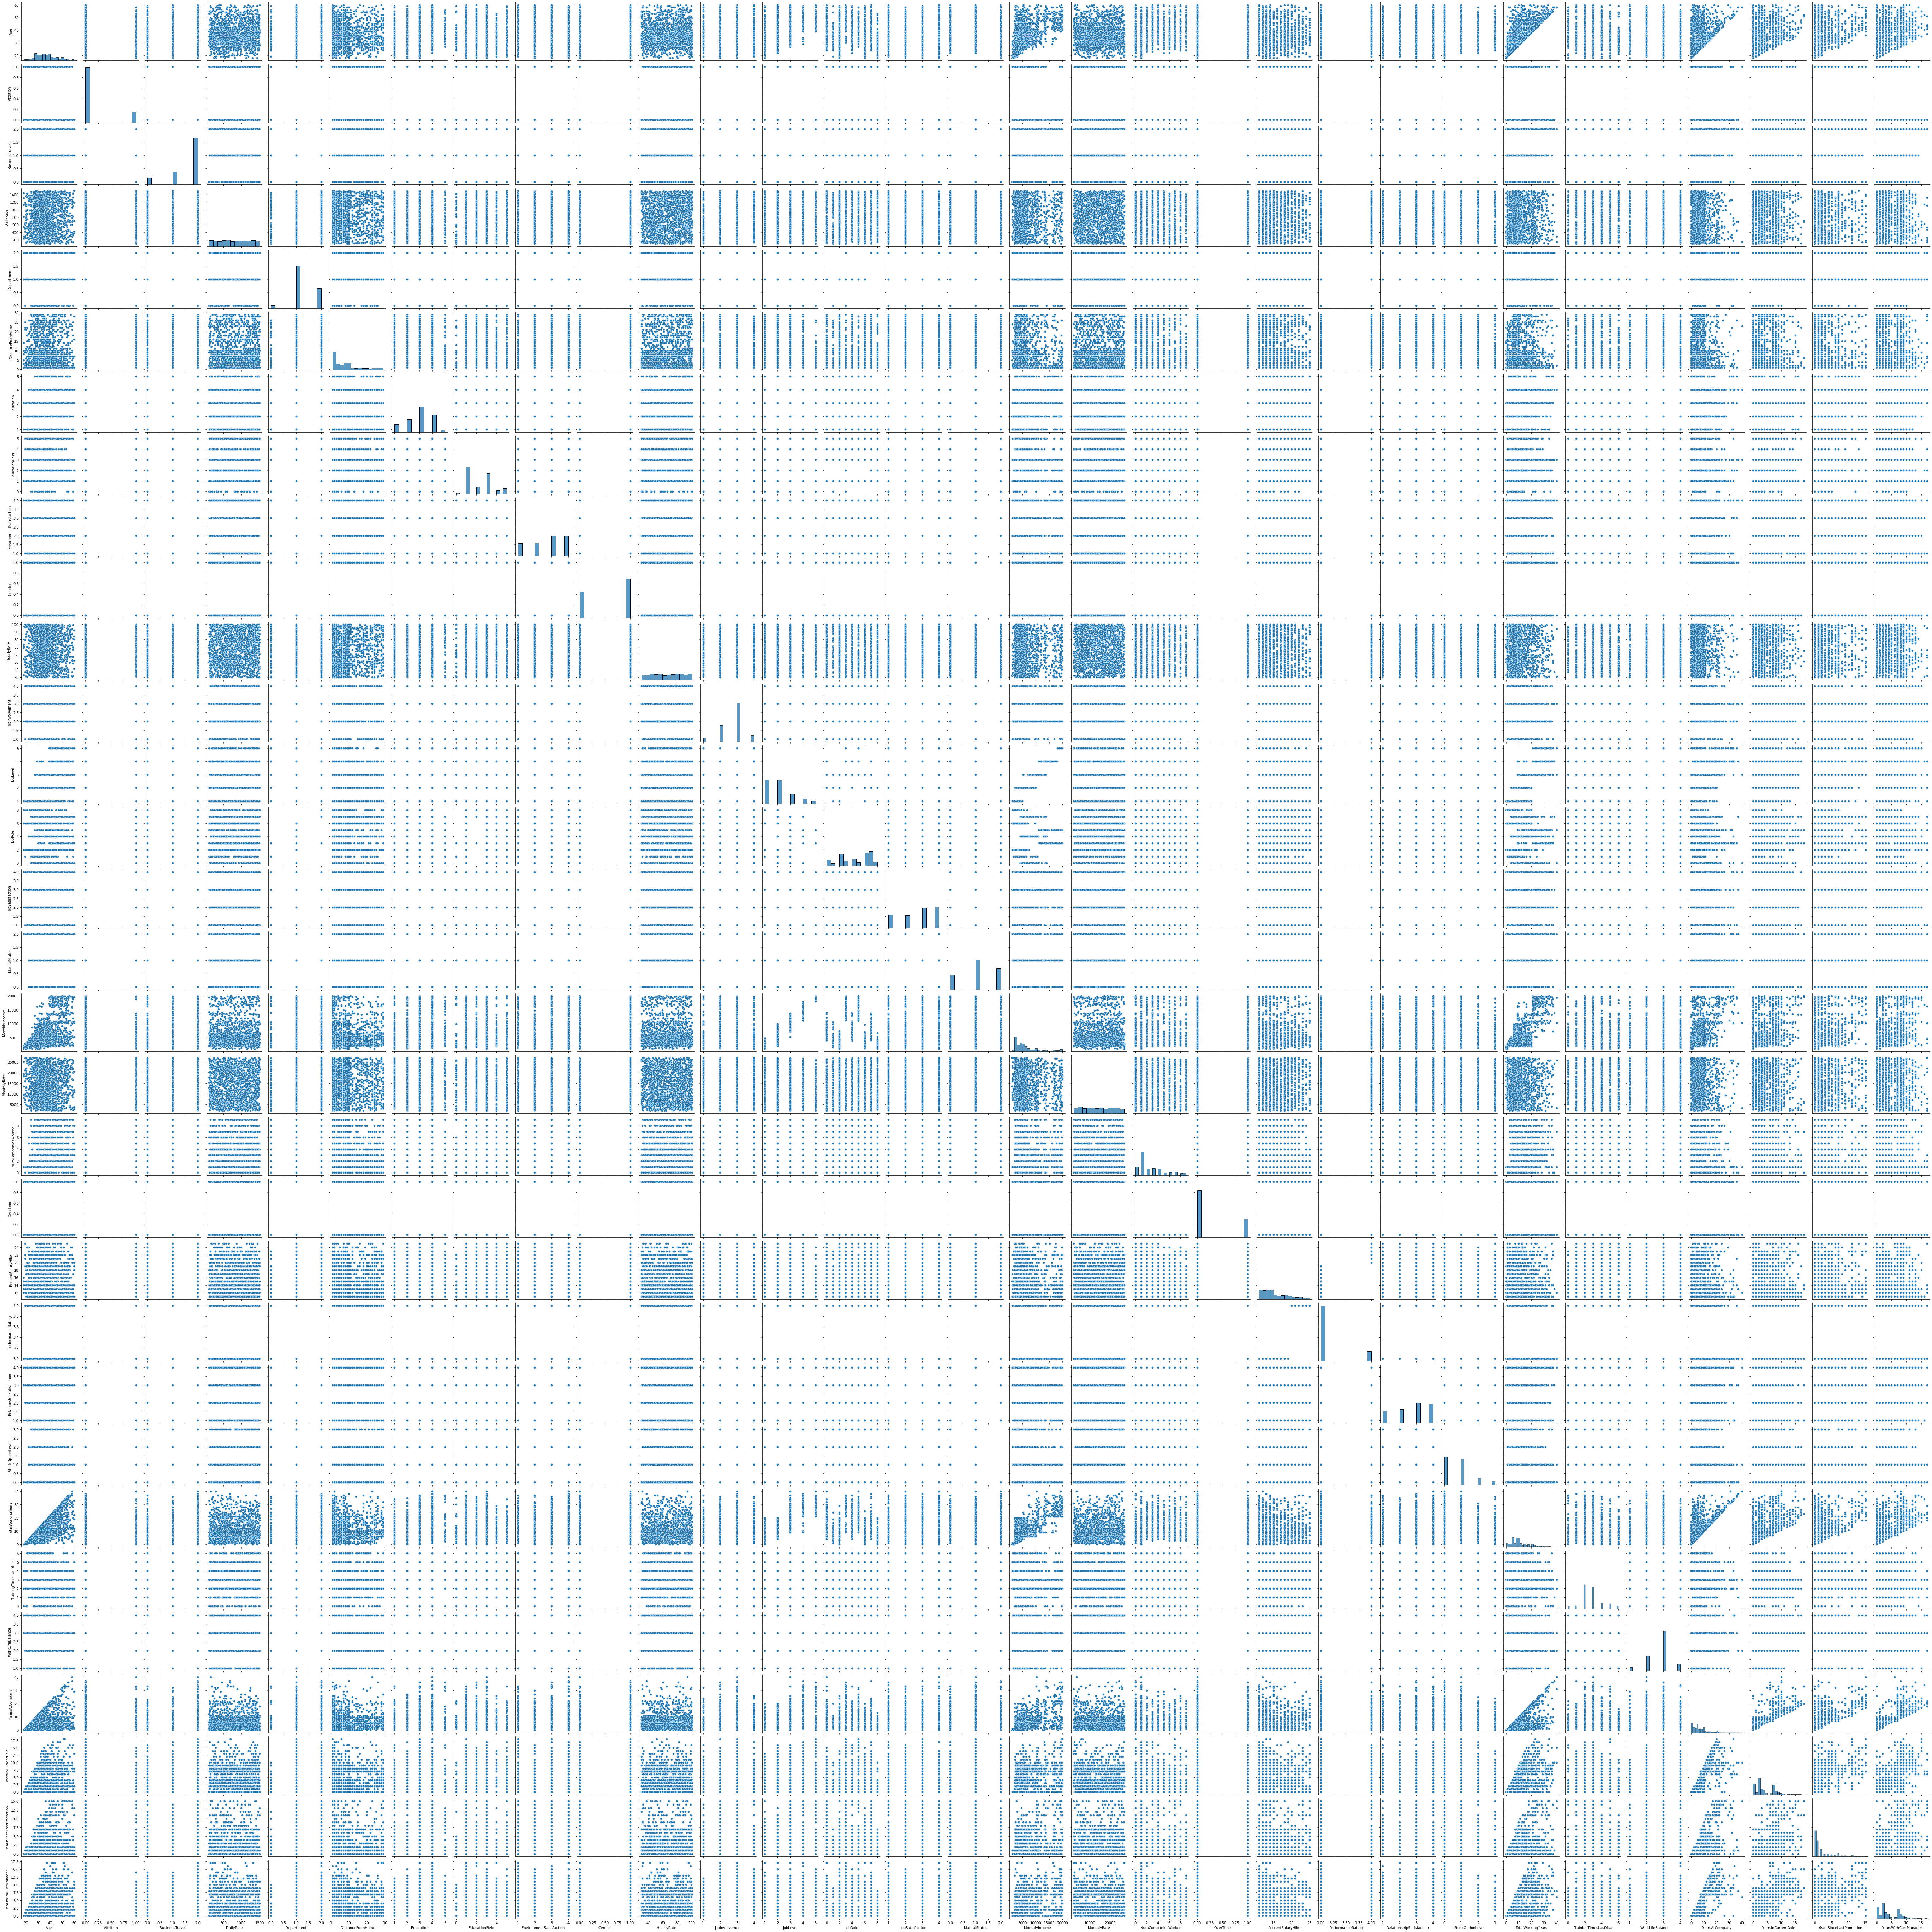

In [32]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

# Checking Outliers using Boxplot

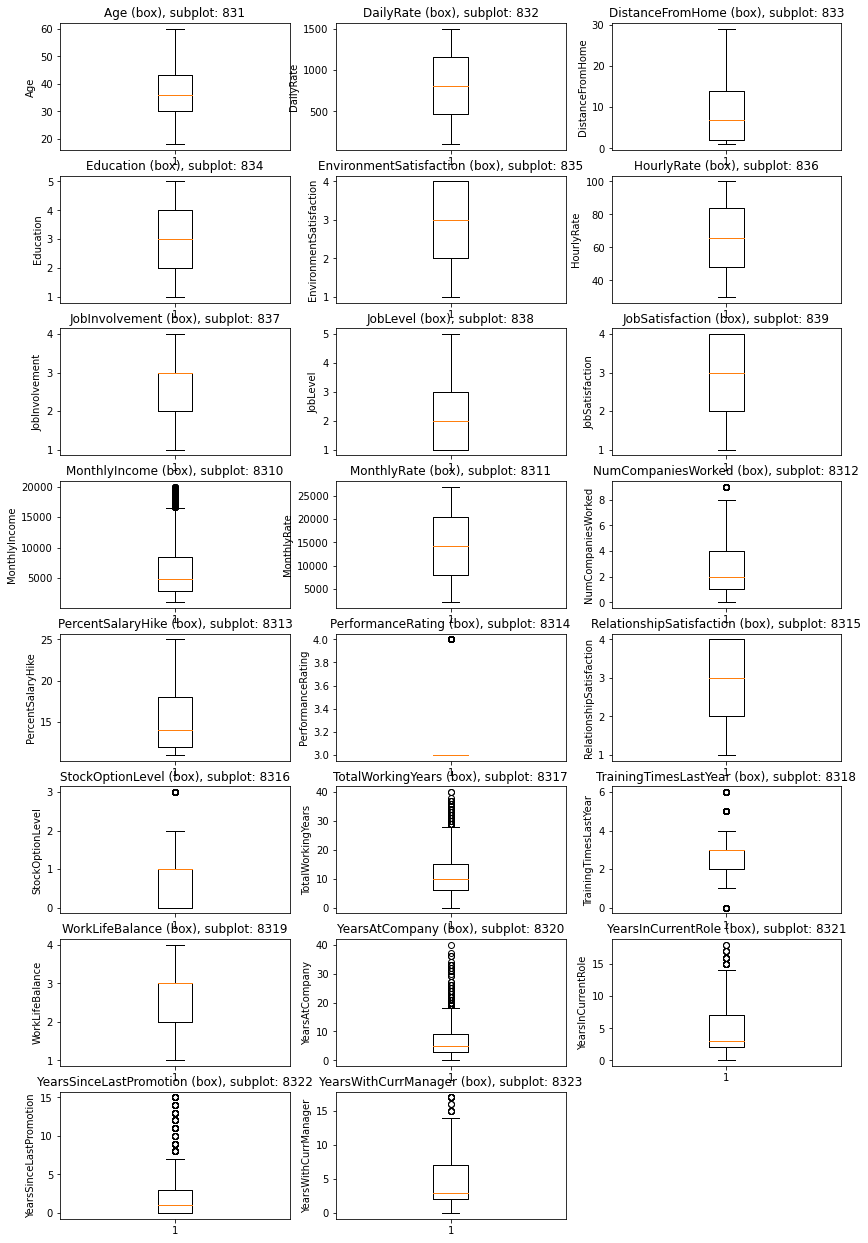

In [33]:
Columns = df_cont.columns

#  plot Numerical Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

plt.show()

* We observe that lot of columns have outliers and lets remove outliers using zscore technique.

# Removing Outliers

In [34]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)
(1470, 31)

(1470, 31)
(1387, 31)


(1470, 31)

In [36]:
loss_percent=((1470-1387)/1470)*100
loss_percent

5.646258503401361

* only 5.6% of data are outliers. Lets remove outliers.

# Checking Skewness

In [37]:
#checking Skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

# Splitting Independent(x) and Target(y) variables.

In [38]:
x = df_new.drop('Attrition', axis = 1)
y = df_new['Attrition']

In [39]:
#removing skewness
from sklearn.preprocessing import power_transform 
#using yeo-johnson method due to presence of negative skewness
x_new = power_transform(x, method='yeo-johnson')        
x_new = pd.DataFrame(x_new, columns = x.columns)

In [40]:
#SKewness removed
x_new.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

In [41]:
#To Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_new)

In [42]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(1387, 30)
(1387,)


# Checking Best Random State

In [43]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.8992805755395683 n Random_state 6


* We have found best random_state value as 6. We will create our train_test_split using random_state(6)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

# Creating Model

In [45]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]


for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"accuracy_score", accuracy_score(y_test,pred))

LogisticRegression() accuracy_score 0.8992805755395683
SVC() accuracy_score 0.894484412470024
GaussianNB() accuracy_score 0.8561151079136691
DecisionTreeClassifier() accuracy_score 0.7721822541966427
KNeighborsClassifier() accuracy_score 0.8465227817745803
RandomForestClassifier() accuracy_score 0.8729016786570744
AdaBoostClassifier() accuracy_score 0.8657074340527577
GradientBoostingClassifier() accuracy_score 0.8776978417266187
BaggingClassifier() accuracy_score 0.8609112709832134


In [46]:
for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print("confusion_matrix\n",confusion_matrix(y_test,pred))
    print("classification_report\n",classification_report(y_test,pred))

confusion_matrix
 [[343  10]
 [ 32  32]]
classification_report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       353
           1       0.76      0.50      0.60        64

    accuracy                           0.90       417
   macro avg       0.84      0.74      0.77       417
weighted avg       0.89      0.90      0.89       417

confusion_matrix
 [[350   3]
 [ 41  23]]
classification_report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       353
           1       0.88      0.36      0.51        64

    accuracy                           0.89       417
   macro avg       0.89      0.68      0.73       417
weighted avg       0.89      0.89      0.87       417

confusion_matrix
 [[317  36]
 [ 24  40]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       353
           1       0.53      0.62      0.57  

# Checking Cross Validation score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    print("Cross Validation Score for",models[model],scr.mean())

Cross Validation Score for LogisticRegression() 0.8695036750383087
Cross Validation Score for SVC() 0.865901358335714
Cross Validation Score for GaussianNB() 0.8146975560345947
Cross Validation Score for DecisionTreeClassifier() 0.7670960704360699
Cross Validation Score for KNeighborsClassifier() 0.8478741916214322
Cross Validation Score for RandomForestClassifier() 0.8550814222268395
Cross Validation Score for AdaBoostClassifier() 0.8673402072565775
Cross Validation Score for GradientBoostingClassifier() 0.8608524011116018
Cross Validation Score for BaggingClassifier() 0.847887177622523


* we can observe KNeighborsClassifier, RandomForestClassifier, AdaBoostClassifier have least difference between Accuracy_score and cross_val_score. so we take this 3 models and perform hypertuning and AUC_ROC curve for better accuracy.

# Hyper Tuning the Model

In [49]:
from sklearn.model_selection import GridSearchCV

# KNeighborsClassifier

In [50]:
KNN_parameters={'n_neighbors':np.arange(1, 16),
            'weights':('uniform', 'distance'),
            'algorithm':('auto','ball_tree','kd_tree','brute')}

In [51]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_parameters,cv=5)

In [53]:
KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [54]:
KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [55]:
KNN_model=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 10,weights='distance')
KNN_model.fit(x_train,y_train)

pred=KNN_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.37170263788968


# AUC ROC curve for KNeighborsClassifier

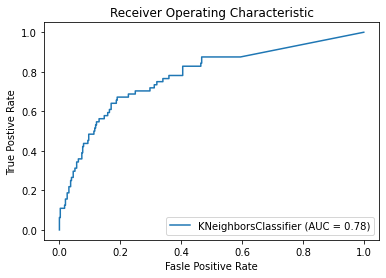

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(KNN_model,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

# RandomForestClassifier

In [57]:
RFC_parameters={'n_estimators':range(5,20),
                'criterion':('gini','entropy'),
                'max_features':('auto', 'sqrt', 'log2')}

In [58]:
RFC=GridSearchCV(RandomForestClassifier(),RFC_parameters,cv=5)

In [59]:
RFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(5, 20)})

In [60]:
RFC.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 19}

In [61]:
RFC_model=RandomForestClassifier(criterion= 'entropy',max_features='auto',n_estimators= 14)
RFC_model.fit(x_train,y_train)

pred=RFC_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.33093525179856


# AUC ROC curve for RandomForestClassifier

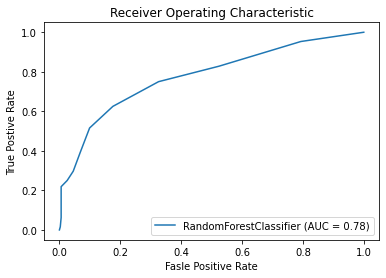

In [62]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RFC_model,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()


# AdaBoostClassifier

In [63]:
ABC_parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}

In [64]:
ABC=GridSearchCV(AdaBoostClassifier(),ABC_parameters,cv=5)

In [65]:
ABC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'n_estimators': range(5, 20),
                         'random_state': range(20, 40)})

In [66]:
ABC.best_params_

{'algorithm': 'SAMME', 'n_estimators': 16, 'random_state': 20}

In [67]:
ABC_model=AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 16,random_state=20)
ABC_model.fit(x_train,y_train)

pred=ABC_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.05035971223022


# AUC ROC curve for AdaBoostClassifier

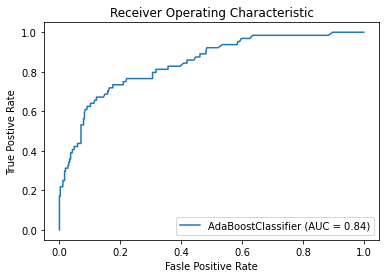

In [68]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ABC_model,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

* After observing Hyper Tuning and AUC_ROC curve of **KNeighborsClassifier, RandomForestClassifier, AdaBoostClassifier** our best mode is **AdaBoostClassifier**.

In [69]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
model=AdaBoostClassifier()
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)  
Acc=accuracy_score(y_test,pre)
recall = recall_score(y_test,pre, average='binary')
precision = precision_score(y_test,pre, average='binary')
f1 = f1_score(y_test, pre)

results = pd.DataFrame([['AdaBoostClassifier', Acc, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

AdaBoostClassifier()


Model  Accuracy  Precision   Recall  F1 Score
0  AdaBoostClassifier  0.865707   0.611111  0.34375      0.44

# Saving a Model

In [70]:
import pickle
filename = 'HR Analysis.pkl'
pickle.dump(ABC_model,open(filename,'wb'))

# Conclusion

In [71]:
Final=np.array(y_test)
Final

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [72]:
predict=np.array(ABC_model.predict(x_test))

In [73]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))

In [74]:
df_pred

original  predicted
0           0          0
1           0          0
2           0          0
3           1          1
4           1          1
..        ...        ...
412         0          0
413         0          0
414         0          1
415         0          0
416         0          0

[417 rows x 2 columns]